<a href="https://www.kaggle.com/code/mikedelong/eda-and-simple-classifiers?scriptVersionId=135180750" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# import numpy as np 
import pandas as pd 

filename = '../input/magic-telescope-dataset/MagicTelescope.csv'
usecols = ['fLength:', 'fWidth:', 'fSize:', 'fConc:', 'fConc1:',
       'fAsym:', 'fM3Long:', 'fM3Trans:', 'fAlpha:', 'fDist:', 'class:']
df = pd.read_csv(filepath_or_buffer=filename, usecols=usecols,)
df.columns = [column[:-1] for column in df.columns]
df.columns = [column[1:] if column.startswith('f') else column for column in df.columns]
df.describe()

,Length,Width,Size,Conc,Conc1,Asym,M3Long,M3Trans,Alpha,Dist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


In [2]:
# our classes are unbalanced; how unbalanced are they?
df['class'].value_counts()

g    12332
h     6688
Name: class, dtype: int64

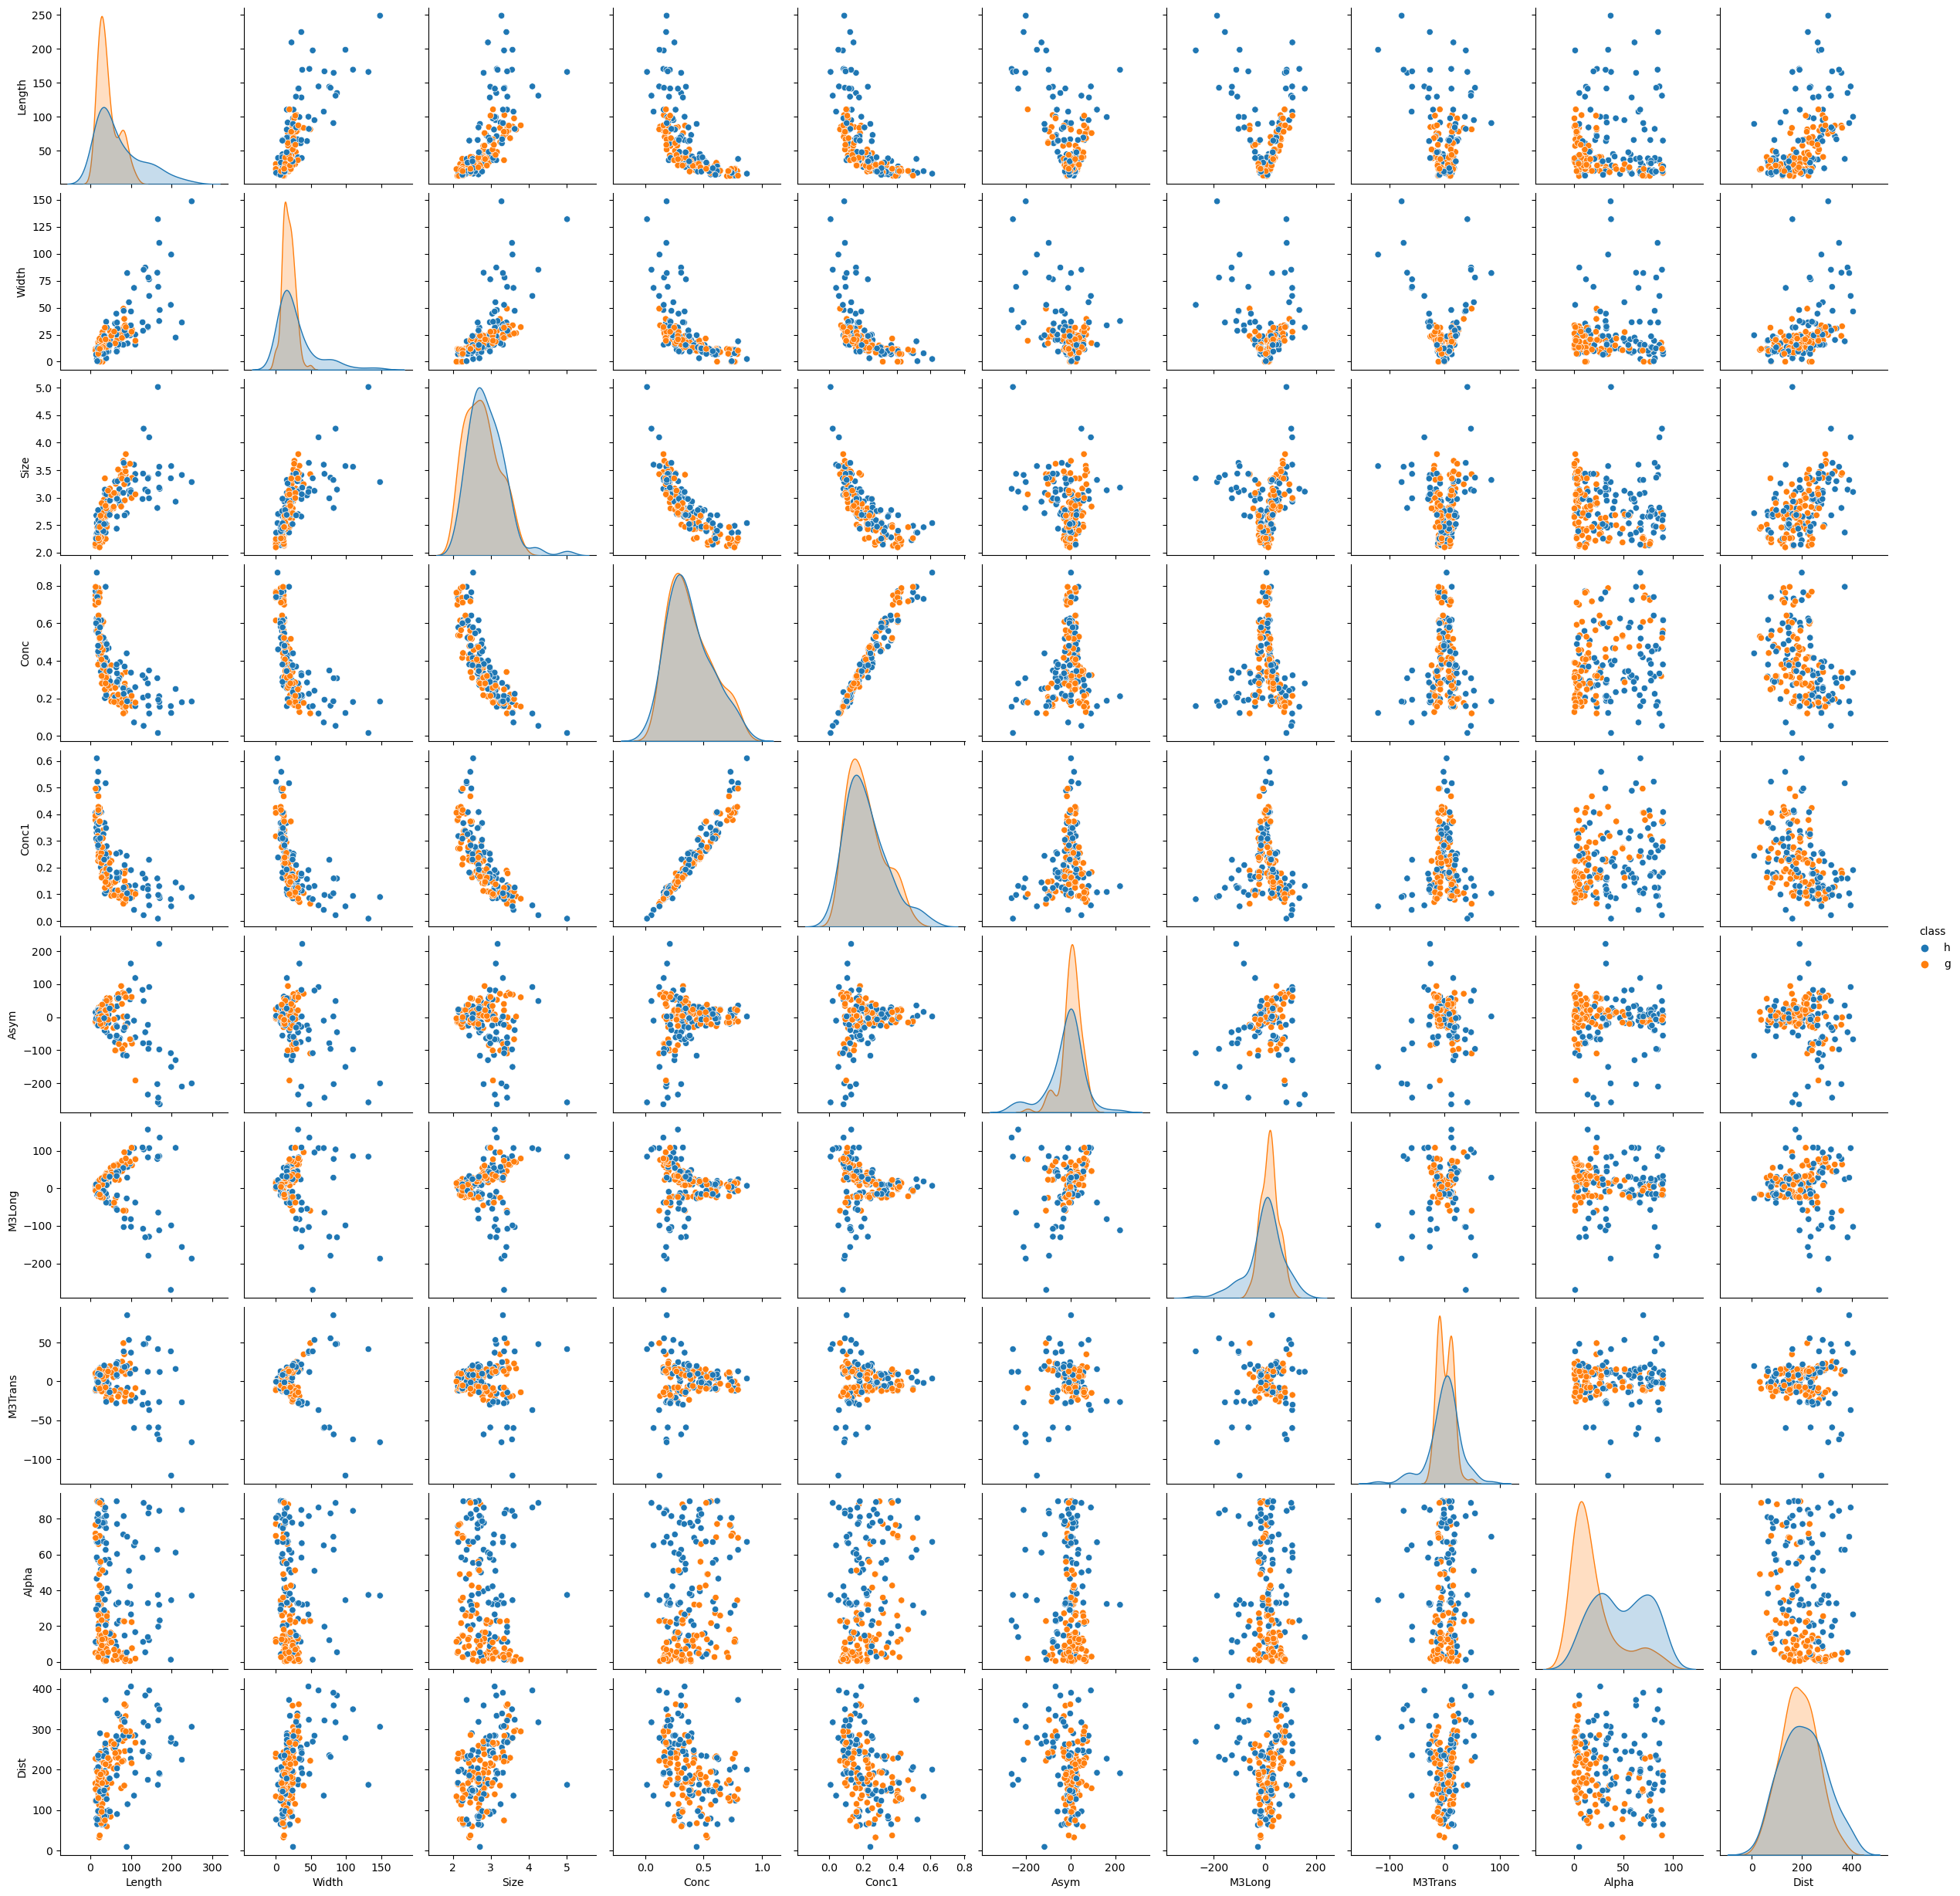

In [3]:
%matplotlib inline
from seaborn import pairplot
# let's visualize a class-balanced sample of the data
sample_size = len(df) // 200
pairplot(data=pd.concat([df[df['class'] == c].sample(n=sample_size) for c in df['class'].unique()]).sample(frac=1.0, ).reset_index(drop=True,), hue='class')

In [4]:
from sklearn.model_selection import train_test_split

random_state = 1
test_size = 0.1
x_train, x_test, y_train, y_test = train_test_split(df[df.columns[:-1]].values, df['class'].values, test_size = test_size, random_state = random_state)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

long_results = False
for model_name, model in {
    'K nearest neigbors (k=16)': KNeighborsClassifier(n_neighbors=16, ),
    'K nearest neigbors (k=32)': KNeighborsClassifier(n_neighbors=32, ),
    'logistic regression': LogisticRegression(max_iter=1000, ),
    'support vector classier' : SVC(),
    'decision tree classifer' : DecisionTreeClassifier(),
    'Naive Bayes' : GaussianNB(),
}.items():
    model.fit(X=x_train, y=y_train)

    y_pred = model.predict(X=x_test)
    if long_results:
        print('classifier: {}'.format(model_name))
        print(classification_report(y_true=y_test, y_pred=y_pred))
        print(confusion_matrix(y_true=y_test, y_pred=y_pred))
        print('accuracy is {:6.3f}'.format(accuracy_score(y_true=y_test, y_pred=y_pred)))
    else:
        print('accuracy / model: {:6.3f} / {}'.format(accuracy_score(y_true=y_test, y_pred=y_pred), model_name))


accuracy / model:  0.805 / K nearest neigbors (k=16)
accuracy / model:  0.791 / K nearest neigbors (k=32)
accuracy / model:  0.780 / logistic regression
accuracy / model:  0.814 / support vector classier
accuracy / model:  0.821 / decision tree classifer
accuracy / model:  0.734 / Naive Bayes
